# MPA Conductance Analysis # 

This script analyzes the AC conductace of the MPA data



In [1]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [89]:
import numpy as np
import lmfit as lmf
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import os
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
%matplotlib inline

#to make fonts from plots look normal
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Calibri'
mpl.rcParams['mathtext.it'] = 'Calibri:italic'
mpl.rcParams['mathtext.bf'] = 'Calibri:bold'

font = {'family' : 'Calibri',
        'weight' : 'normal',
        'size'   : 36}
        #'sans-serif' : 'Arial Unicode MS'}
mpl.rc('font', **font)
plt.rc('font', size=36)          # controls default text sizes

#mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally
mpl.rcParams['lines.markersize'] = 16
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
#mpl.rcParams['xtick.top'] = False
#mpl.rcParams['ytick.right'] = False




os.chdir(r'C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\analysis_work\MPA\09_2016_m1\dev3\data_set\data')

# os.listdir()
tmax = 13
T = np.linspace(180,180+(10*tmax),tmax,endpoint=False)
devNum = 3
voltage1 = 400
voltage2 = 500
voltage3 = 600
voltage4 = 0

nPoints = 100
master400mv = np.zeros((tmax,nPoints,2))
master500mv = np.zeros((tmax,nPoints,2))
master600mv = np.zeros((tmax,nPoints,2))
master0mv = np.zeros((tmax,nPoints,2))

# the tmp data has the following format:
#      index 0 is frequency in rad/s
#      index 1 is capacitance, C
#      index 2 is susceptance, B
#      index 3 is dissipation, D
#      index 4 is conductance, G



for t in range(0,tmax):
    file1 = 'dev' + str(devNum) + '_T' + np.array2string(T[t].astype(int)) +'K_Vbias' + str(voltage1) + 'mV_All_Modified.txt'     
    tmp1 = np.genfromtxt(file1)
    master400mv[t,:,0] = tmp1[2:,0]
    master400mv[t,:,1] = savitzky_golay(tmp1[2:,4],51,5)
    
    file2 = 'dev' + str(devNum) + '_T' + np.array2string(T[t].astype(int)) +'K_Vbias' + str(voltage2) + 'mV_All_Modified.txt'     
    tmp2 = np.genfromtxt(file2)
    master500mv[t,:,0] = tmp2[2:,0]
    master500mv[t,:,1] = savitzky_golay(tmp2[2:,4],51,5)
    
    file3 = 'dev' + str(devNum) + '_T' + np.array2string(T[t].astype(int)) +'K_Vbias' + str(voltage3) + 'mV_All_Modified.txt'     
    tmp3 = np.genfromtxt(file3)
    master600mv[t,:,0] = tmp3[2:,0]
    master600mv[t,:,1] = savitzky_golay(tmp3[2:,4],51,5)
    
    file4 = 'dev' + str(devNum) + '_T' + np.array2string(T[t].astype(int)) +'K_Vbias' + str(voltage4) + 'mV_All_Modified.txt'     
    tmp4 = np.genfromtxt(file4)
    master0mv[t,:,0] = tmp4[2:,0]
    master0mv[t,:,1] = savitzky_golay(tmp4[2:,4],51,5)


 
    
# define some simple functions to make the analysis code a bit more concise
def sig400(T):
    return (master400mv[T,:,1]*2.9e-5)/4e-2

def sig500(T):
    return (master500mv[T,:,1]*2.9e-5)/4e-2

def sig600(T):
    return (master600mv[T,:,1]*2.9e-5)/4e-2

def sig0(T):
    return (master0mv[T,:,1]*2.9e-5)/4e-2

def w(T):
    return master400mv[t,:,0]


# input useful constants
kB = 8.617e-5

# make colormap corresponding to full dat set in Matlab
colSet = (cm.plasma(np.linspace(0,1,13)))

# # # colormap offsets to correctly color the data
# cOff1 = 0
# cOff2 = 16

# make colormap corresponding to temeperature range we want to fit
# colSet = colSet_tot[cOff1:cOff2]

# indicate the figures directory
figDir = r'C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\ligand_manuscript\currentVersion\MPA\conductance\python'

# # input offsets to ensure we overlap the matlab data
# off1 = 9
# off2 = 13

Plot the data to make sure we did this right.

(100.0, 10000000.0)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


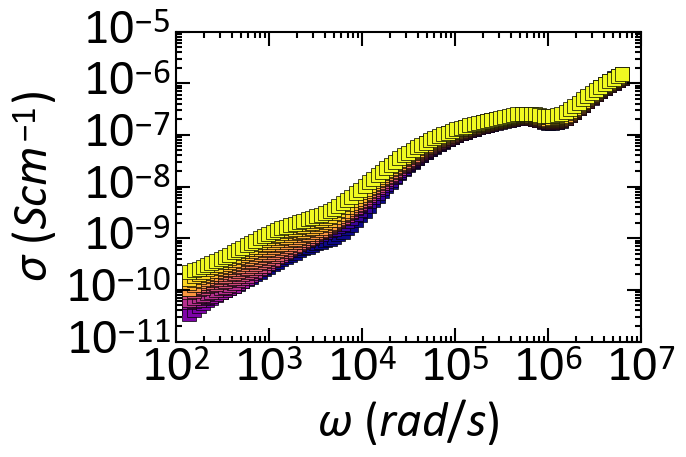

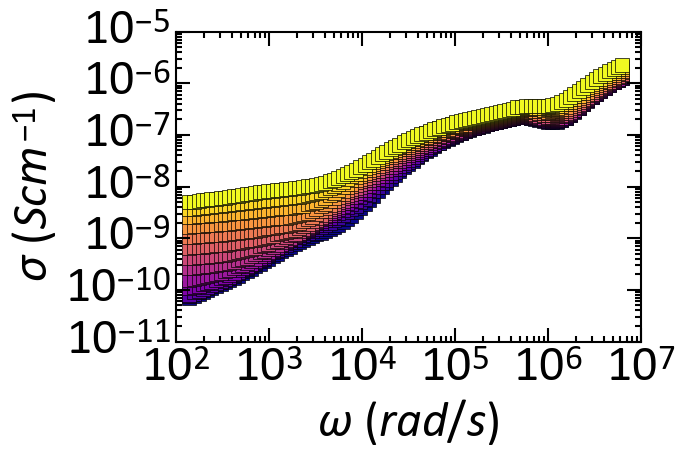

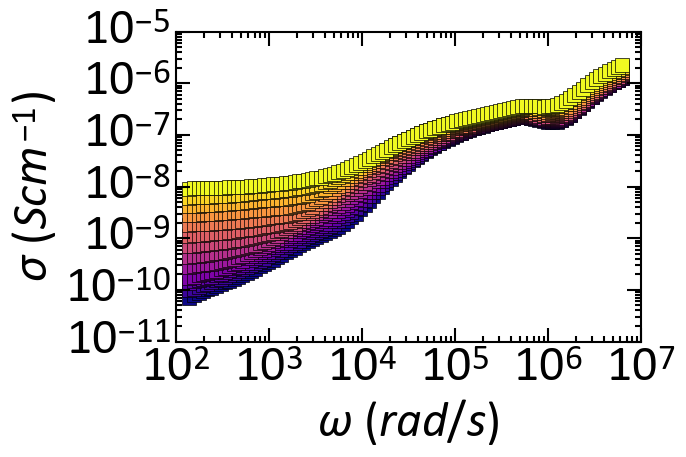

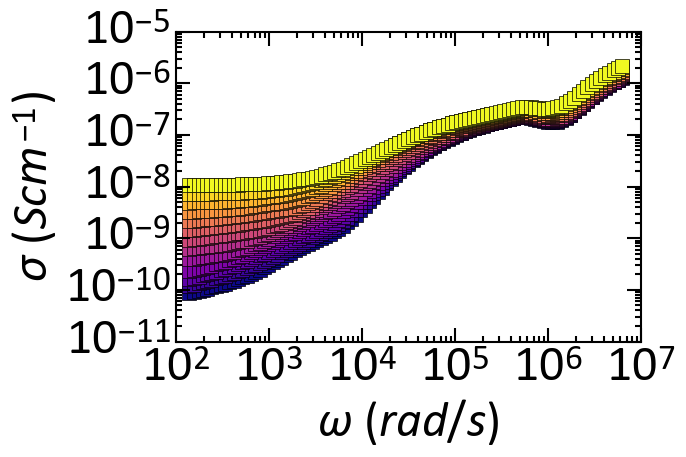

In [90]:

# plot conductance data
fig,ax = plt.subplots(1,1)
for t in range(0,tmax):
    ax.plot(w(t),sig0(t),'s',color=tuple(colSet[t]),markersize = 10)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])


# plot conductance data
fig,ax = plt.subplots(1,1)
for t in range(0,tmax):
    ax.plot(w(t),sig400(t),'s',color=tuple(colSet[t]),markersize = 10)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])

# plot conductance data
fig,ax = plt.subplots(1,1)
for t in range(0,tmax):
    ax.plot(w(t),sig500(t),'s',color=tuple(colSet[t]),markersize = 10)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])


# plot conductance data
fig,ax = plt.subplots(1,1)
for t in range(0,tmax):
    ax.plot(w(t),sig600(t),'s',color=tuple(colSet[t]),markersize = 10)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])

In [91]:
(100/23)*(7.4e4/(2*np.pi))*8.854e-14*3.7

1.6775105380345153e-08

In [92]:
(190/63)*(7.4e4/(2*np.pi))*8.854e-14*10

3.1448824758519225e-08

Pick fixed $\omega$ values and run fits.

(100.0, 10000000.0)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


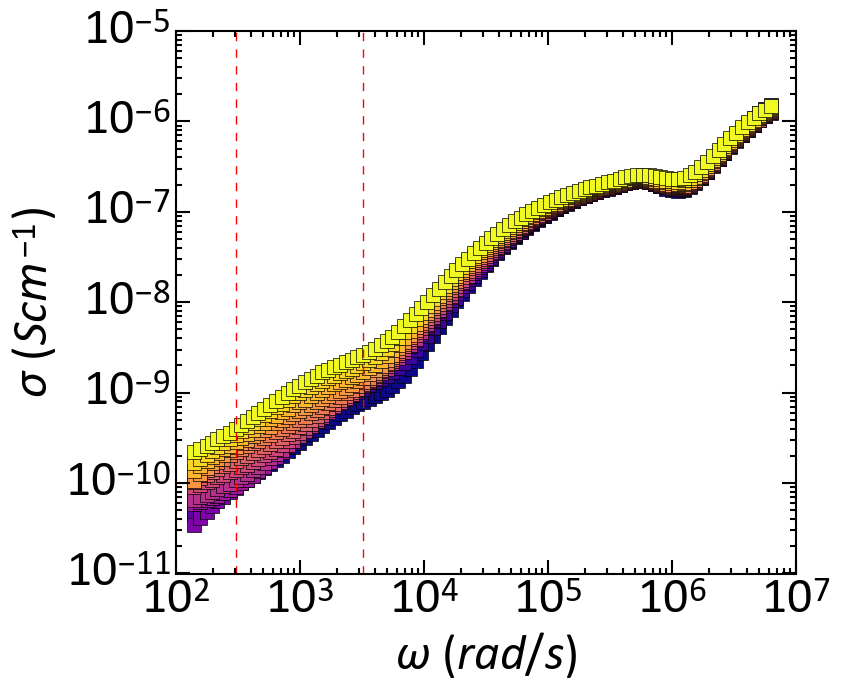

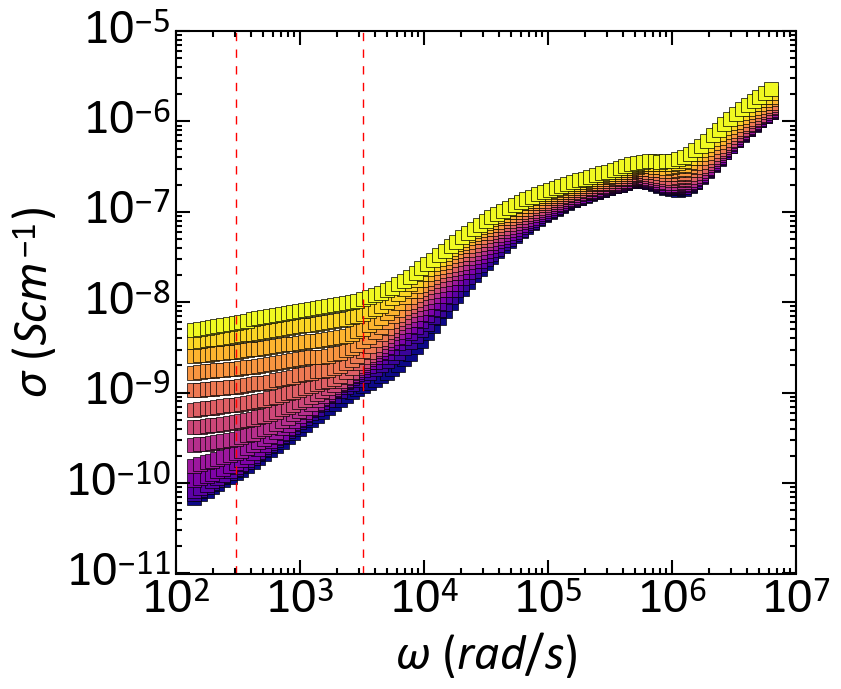

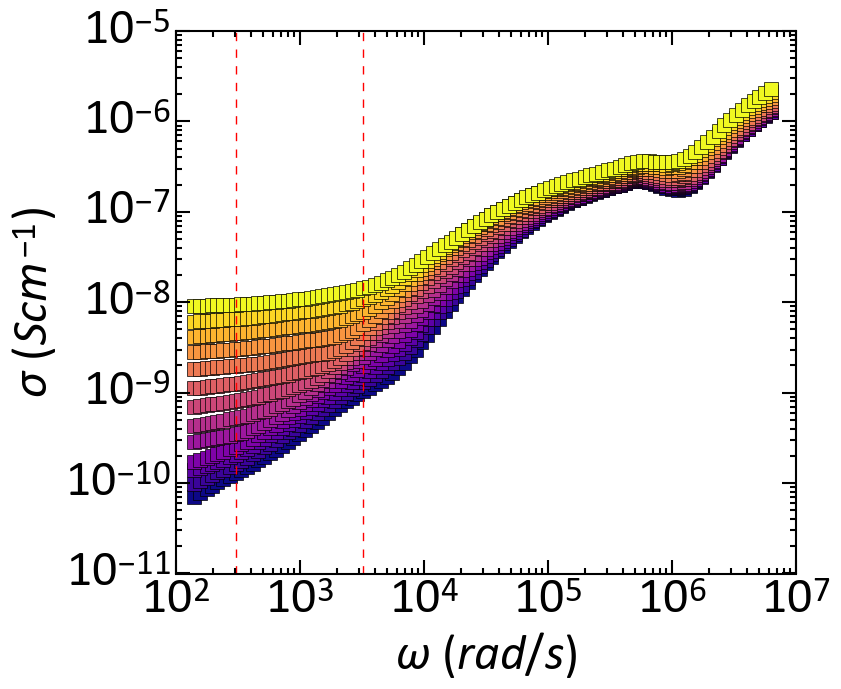

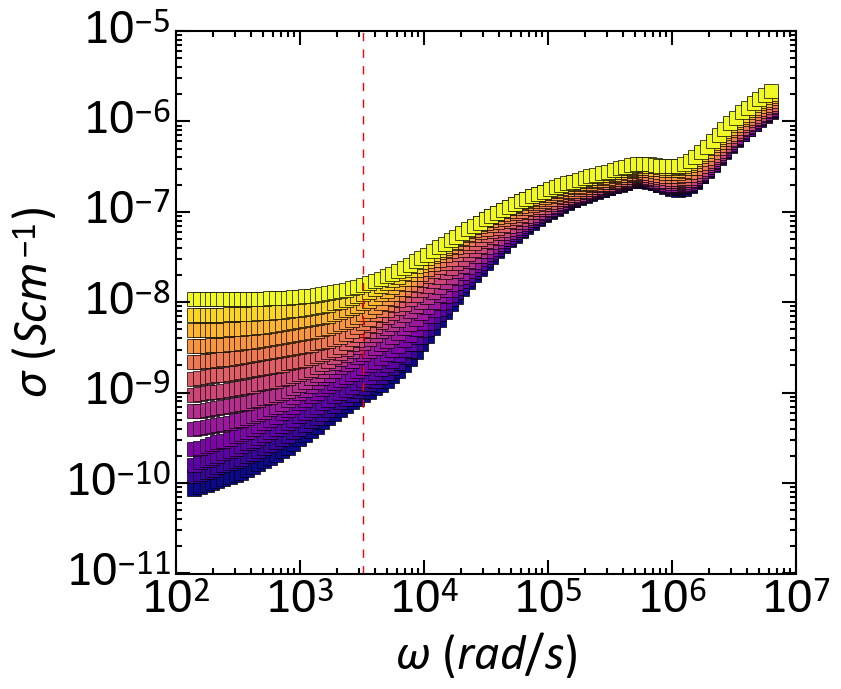

In [93]:
# first pick high omega index
lwIdx = np.where(w(1) >= 3e2)[0][0]
omegaLow = w(1)[lwIdx]

# pick low omega index
hIdx = np.where(w(1) >= 3e3)[0][0]
omegaHi = w(1)[hIdx]

# collect sigma at specified frequencies at both 400 and 600 mV
sigmaLow0 = np.zeros(tmax)
sigmaLow4 = np.zeros(tmax)
sigmaLow5 = np.zeros(tmax)
sigmaLow6 = np.zeros(tmax)

sigmaHi0 = np.zeros(tmax)
sigmaHi4 = np.zeros(tmax)
sigmaHi5 = np.zeros(tmax)
sigmaHi6 = np.zeros(tmax)

for t in range(0,tmax):
    sigmaLow0[t] = sig0(t)[lwIdx]
    sigmaHi0[t] = sig0(t)[hIdx]
    
    sigmaLow4[t] = sig400(t)[lwIdx]
    sigmaHi4[t] = sig400(t)[hIdx]
    
    sigmaLow5[t] = sig500(t)[lwIdx]
    sigmaHi5[t] = sig500(t)[hIdx]
    
    sigmaLow6[t] = sig600(t)[lwIdx]
    sigmaHi6[t] = sig600(t)[hIdx]

    
# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(w(t),sig0(t),'s',color=tuple(colSet[t]),markersize = 10)
    
plt.axvline(omegaHi,color = 'r',linestyle = 'dashed', linewidth = 1)
plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])    
    
    
# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(w(t),sig400(t),'s',color=tuple(colSet[t]),markersize = 10)
    
plt.axvline(omegaHi,color = 'r',linestyle = 'dashed', linewidth = 1)
plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])


# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(w(t),sig500(t),'s',color=tuple(colSet[t]),markersize = 10)
    
plt.axvline(omegaHi,color = 'r',linestyle = 'dashed', linewidth = 1)
plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])


# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(w(t),sig600(t),'s',color=tuple(colSet[t]),markersize = 10)
    
plt.axvline(omegaHi,color = 'r',linestyle = 'dashed', linewidth = 1)
ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])

Now run the fits

Low omega, high T, 0mV: 0.09883791532144687 +\- 0.005896079758581746
Low omega, low T, 0mV: 0.027896161710159968 +\- 0.003576496623656436
Low omega, high T, 400mV: 0.2725928065328026 +\- 0.0064183044843098115
Low omega, low T, 400mV: 0.0751329763682925 +\- 0.013003907122194198
Low omega, high T, 500mV: 0.26180076558731824 +\- 0.01935697186289331
Low omega, low T, 500mV: 0.09236816260272797 +\- 0.01744355616530393
Low omega, high T, 600mV: 0.25011672167620774 +\- 0.021964201479113227
Low omega, low T , 600mV: 0.14243569414302124 +\- 0.014327265198318034


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


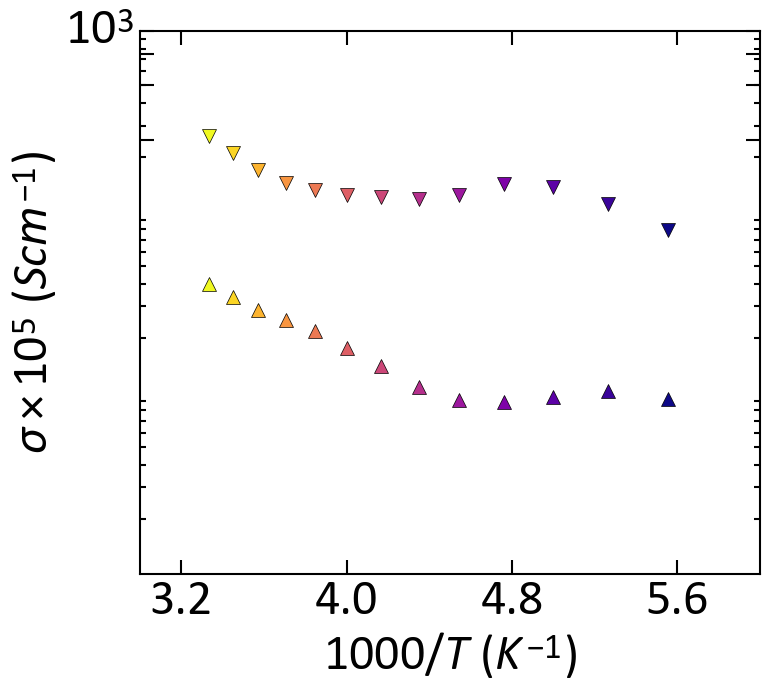

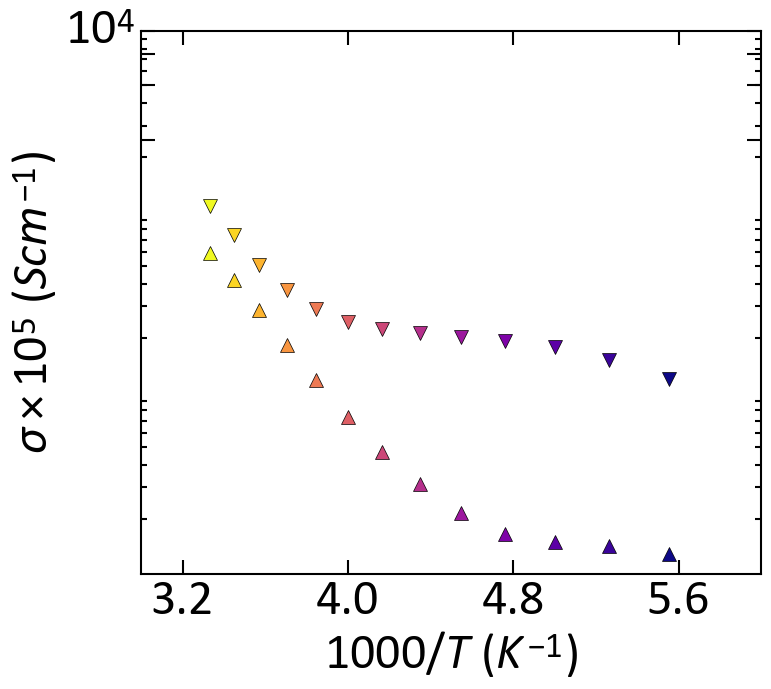

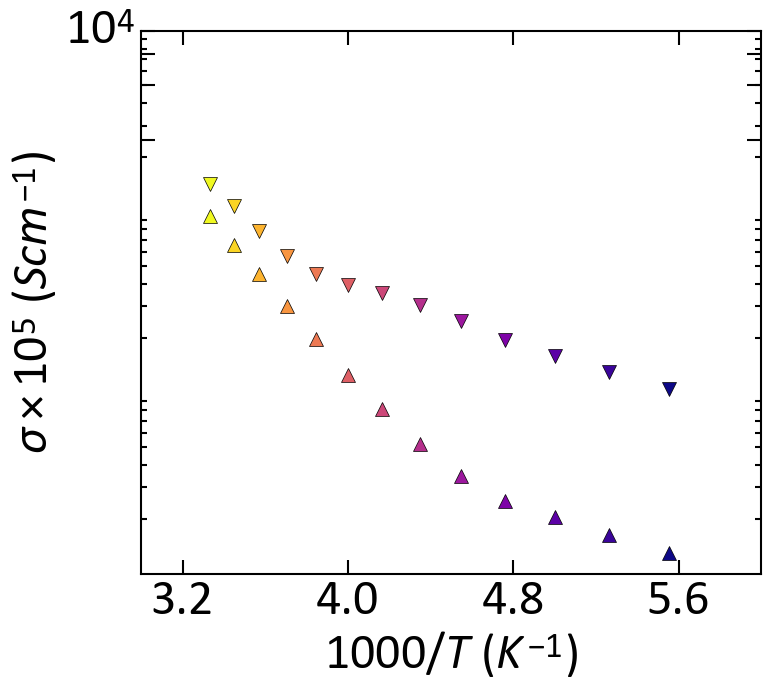

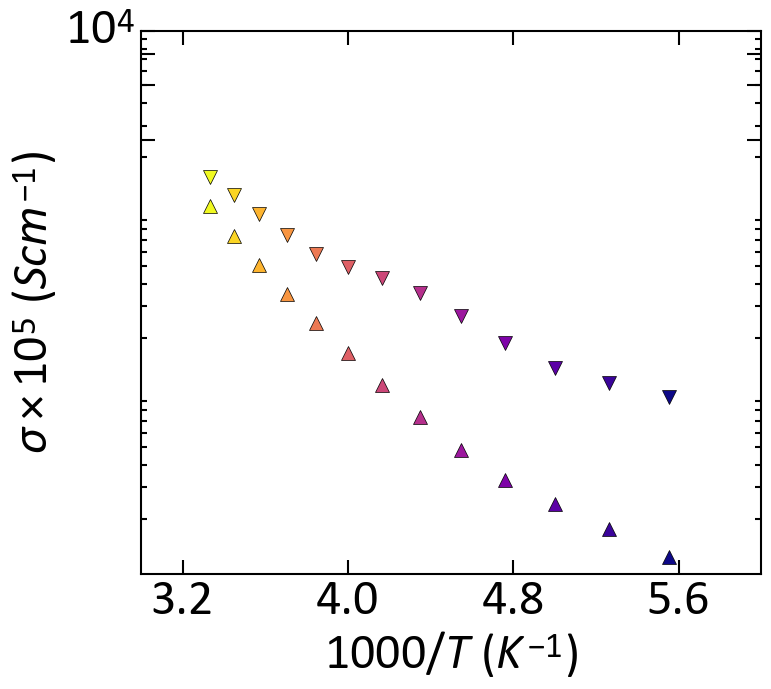

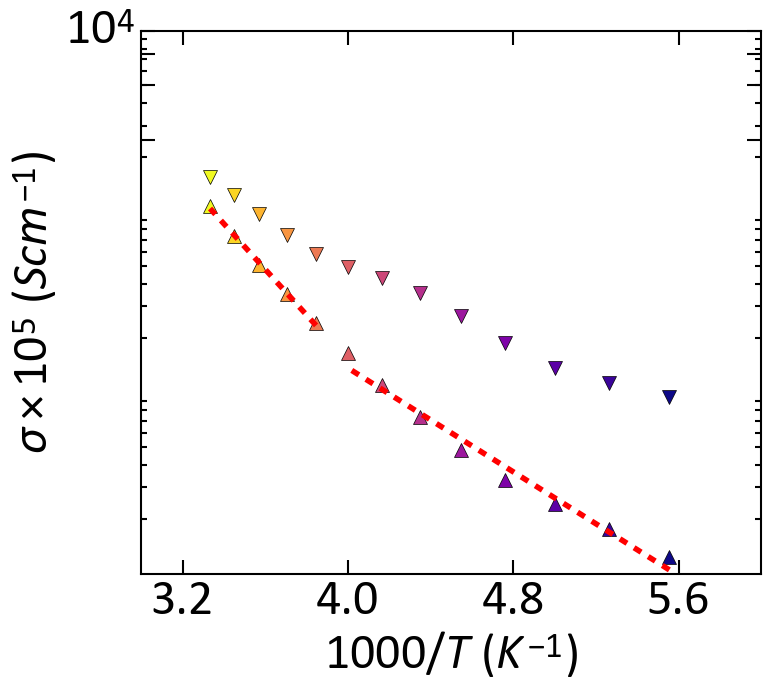

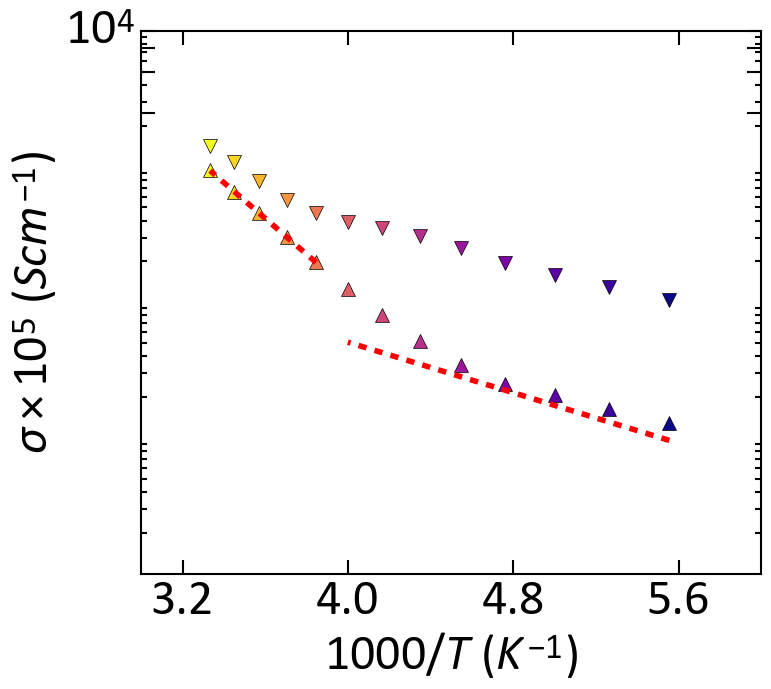

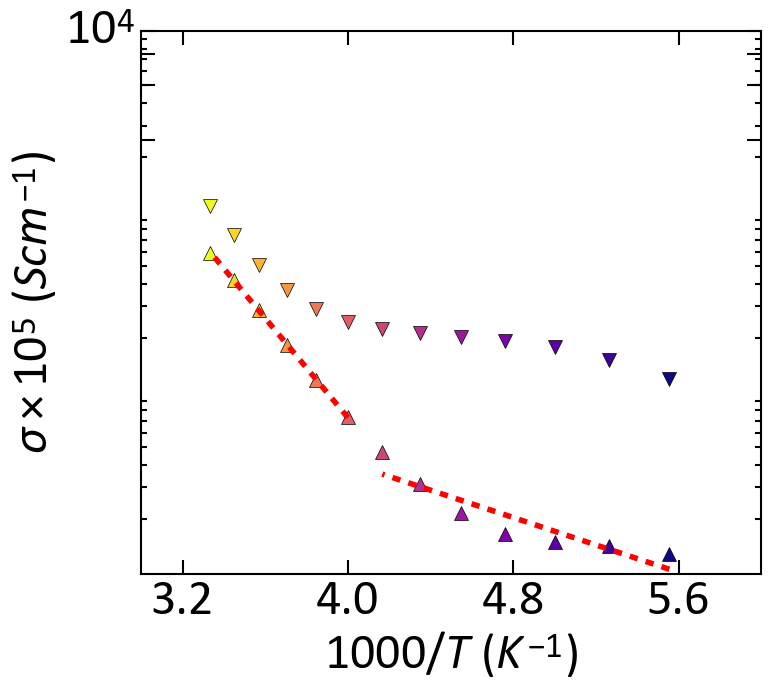

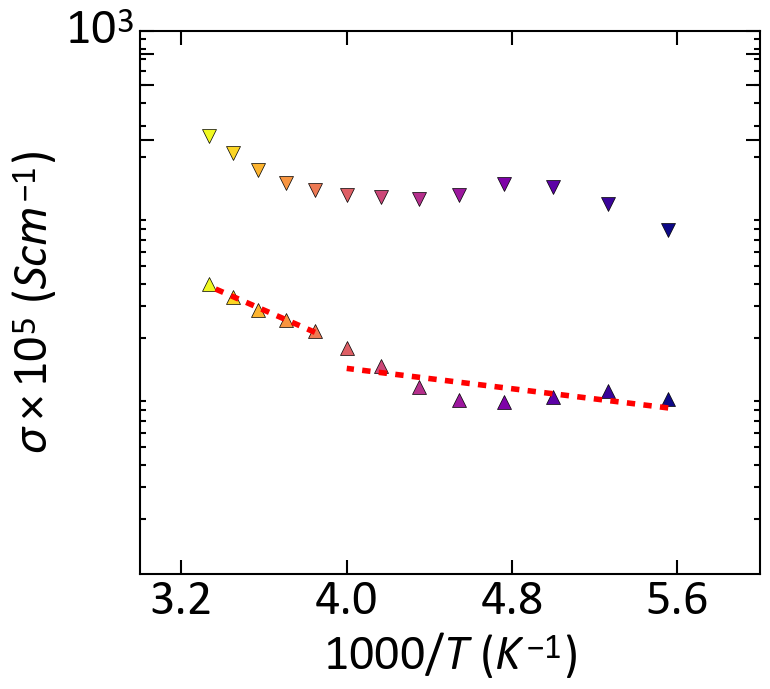

In [94]:

# plot Arrhenius for 0 mV (sans fit)
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow0[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaHi0[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
    
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))


# plot Arrhenius for 400 mV (sans fit)
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow4[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaHi4[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
    
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))


# plot Arrhenius for 500 mV (sans fit)
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow5[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaHi5[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
    
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))


# plot Arrhenius for 600 mV (sans fit)
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow6[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaHi6[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
    
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))


# create data arrays for low omega, high T 600mV (from T = 240 to T = 300)
xLow6a = np.vstack( [1e3/T[8:],np.ones(len(T[8:]))]).T
yLow6a = np.log(sigmaLow6[8:])
# create data arrays for low omega, low T 600mV (from T = 180 to T = 230)
xLow6b = np.vstack( [1e3/T[:8],np.ones(len(T[:8]))]).T
yLow6b = np.log(sigmaLow6[:8])

# create data arrays for low omega, high T 500mV (from T = 240 to T = 300)
xLow5a = np.vstack( [1e3/T[8:],np.ones(len(T[8:]))]).T
yLow5a = np.log(sigmaLow5[8:])
# create data arrays for low omega, low T 500mV (from T = 180 to T = 230)
xLow5b = np.vstack( [1e3/T[:8],np.ones(len(T[:8]))]).T
yLow5b = np.log(sigmaLow4[:8])

# create data arrays for low omega, high T 400mV (from T = 230 to T = 300)
xLow4a = np.vstack( [1e3/T[7:],np.ones(len(T[7:]))]).T
yLow4a = np.log(sigmaLow4[7:])
# create data arrays for low omega, low T 400mV (from T = 180 to T = 220)
xLow4b = np.vstack( [1e3/T[:7],np.ones(len(T[:7]))]).T
yLow4b = np.log(sigmaLow4[:7])

# create data arrays for low omega, high T 0mV (from T = 240 to T = 300)
xLow0a = np.vstack( [1e3/T[8:],np.ones(len(T[8:]))]).T
yLow0a = np.log(sigmaLow0[8:])
# create data arrays for low omega, low T 0mV (from T = 180 to T = 230)
xLow0b = np.vstack( [1e3/T[:8],np.ones(len(T[:8]))]).T
yLow0b = np.log(sigmaLow0[:8])



# fit to low omega, high T 600mV with error estimates
mL6a,cL6a = np.linalg.lstsq(xLow6a,yLow6a)[0]
El6a = np.abs((kB*mL6a)*1e3)
LineL6a =  np.exp(mL6a*(1e3/T[8:])) * np.exp(cL6a)
coeffL6a = np.array([mL6a, cL6a])
# error estimates
dLenL6a = len(yLow6a)
coeffLenL6a = len(coeffL6a)
rmseL6a = np.sum((yLow6a - np.dot(xLow6a,coeffL6a))**2)/(dLenL6a-coeffLenL6a)
covMatL6a = rmseL6a*np.linalg.inv(np.dot(xLow6a.T,xLow6a))
stdErrL6a = np.sqrt(np.diagonal(covMatL6a))
El6aErr = stdErrL6a[0]*El6a

# fit to low omega, low T 600mV with error estimates
mL6b,cL6b = np.linalg.lstsq(xLow6b,yLow6b)[0]
El6b = np.abs((kB*mL6b)*1e3)
LineL6b =  np.exp(mL6b*(1e3/T[:8])) * np.exp(cL6b)
coeffL6b = np.array([mL6b, cL6b])
# error estimates
dLenL6b = len(yLow6b)
coeffLenL6b = len(coeffL6b)
rmseL6b = np.sum((yLow6b - np.dot(xLow6b,coeffL6b))**2)/(dLenL6b-coeffLenL6b)
covMatL6b = rmseL6b*np.linalg.inv(np.dot(xLow6b.T,xLow6b))
stdErrL6b = np.sqrt(np.diagonal(covMatL6b))
El6bErr = stdErrL6b[0]*El6b


# fit to low omega, high T 500mV with error estimates
mL5a,cL5a = np.linalg.lstsq(xLow5a,yLow5a)[0]
El5a = np.abs((kB*mL5a)*1e3)
LineL5a =  np.exp(mL5a*(1e3/T[8:])) * np.exp(cL5a)
coeffL5a = np.array([mL5a, cL5a])
# error estimates
dLenL5a = len(yLow5a)
coeffLenL5a = len(coeffL5a)
rmseL5a = np.sum((yLow5a - np.dot(xLow5a,coeffL5a))**2)/(dLenL5a-coeffLenL5a)
covMatL5a = rmseL5a*np.linalg.inv(np.dot(xLow5a.T,xLow5a))
stdErrL5a = np.sqrt(np.diagonal(covMatL5a))
El5aErr = stdErrL5a[1]*El5a

# fit to low omega, low T 500mV with error estimates
mL5b,cL5b = np.linalg.lstsq(xLow5b,yLow5b)[0]
El5b = np.abs((kB*mL5b)*1e3)
LineL5b =  np.exp(mL5b*(1e3/T[:8])) * np.exp(cL5b)
coeffL5b = np.array([mL5b, cL5b])
# error estimates
dLenL5b = len(yLow5b)
coeffLenL5b = len(coeffL5b)
rmseL5b = np.sum((yLow5b - np.dot(xLow5b,coeffL5b))**2)/(dLenL5b-coeffLenL5b)
covMatL5b = rmseL5b*np.linalg.inv(np.dot(xLow5b.T,xLow5b))
stdErrL5b = np.sqrt(np.diagonal(covMatL5b))
El5bErr = stdErrL5b[0]*El5b


# fit to low omega, high T 400mV with error estimates
mL4a,cL4a = np.linalg.lstsq(xLow4a,yLow4a)[0]
El4a = np.abs((kB*mL4a)*1e3)
LineL4a =  np.exp(mL4a*(1e3/T[7:])) * np.exp(cL4a)
coeffL4a = np.array([mL4a, cL4a])
# error estimates
dLenL4a = len(yLow4a)
coeffLenL4a = len(coeffL4a)
rmseL4a = np.sum((yLow4a - np.dot(xLow4a,coeffL4a))**2)/(dLenL4a-coeffLenL4a)
covMatL4a = rmseL4a*np.linalg.inv(np.dot(xLow4a.T,xLow4a))
stdErrL4a = np.sqrt(np.diagonal(covMatL4a))
El4aErr = stdErrL4a[0]*El4a

# fit to low omega, low T 400mV with error estimates
mL4b,cL4b = np.linalg.lstsq(xLow4b,yLow4b)[0]
El4b = np.abs((kB*mL4b)*1e3)
LineL4b =  np.exp(mL4b*(1e3/T[:7])) * np.exp(cL4b)
coeffL4b = np.array([mL4b, cL4b])
# error estimates
dLenL4b = len(yLow4b)
coeffLenL4b = len(coeffL4b)
rmseL4b = np.sum((yLow4b - np.dot(xLow4b,coeffL4b))**2)/(dLenL4b-coeffLenL4b)
covMatL4b = rmseL4b*np.linalg.inv(np.dot(xLow4b.T,xLow4b))
stdErrL4b = np.sqrt(np.diagonal(covMatL4b))
El4bErr = stdErrL4b[0]*El4b

# fit to low omega, high T 0mV with error estimates
mL0a,cL0a = np.linalg.lstsq(xLow0a,yLow0a)[0]
El0a = np.abs((kB*mL0a)*1e3)
LineL0a =  np.exp(mL0a*(1e3/T[8:])) * np.exp(cL0a)
coeffL0a = np.array([mL0a, cL0a])
# error estimates
dLenL0a = len(yLow0a)
coeffLenL0a = len(coeffL0a)
rmseL0a = np.sum((yLow0a - np.dot(xLow0a,coeffL0a))**2)/(dLenL0a-coeffLenL0a)
covMatL0a = rmseL0a*np.linalg.inv(np.dot(xLow0a.T,xLow0a))
stdErrL0a = np.sqrt(np.diagonal(covMatL0a))
El0aErr = stdErrL0a[0]*El0a

# fit to low omega, low T 0mV with error estimates
mL0b,cL0b = np.linalg.lstsq(xLow0b,yLow0b)[0]
El0b = np.abs((kB*mL0b)*1e3)
LineL0b =  np.exp(mL0b*(1e3/T[:8])) * np.exp(cL0b)
coeffL0b = np.array([mL0b, cL0b])
# error estimates
dLenL0b = len(yLow0b)
coeffLenL0b = len(coeffL0b)
rmseL0b = np.sum((yLow0b - np.dot(xLow0b,coeffL0b))**2)/(dLenL0b-coeffLenL0b)
covMatL0b = rmseL0b*np.linalg.inv(np.dot(xLow0b.T,xLow0b))
stdErrL0b = np.sqrt(np.diagonal(covMatL0b))
El0bErr = stdErrL0b[0]*El0b


# plot 600 mV data and fits
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow6[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaHi6[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
#     ax.plot(1e3/T[t],omegaD_sigma[t]/1e-5,'^',color = tuple(colSet2[t]),markersize = 15)

ax.plot(1e3/T[8:],LineL6a[:]*1e11,color = 'r',linestyle='dashed' )
ax.plot(1e3/T[:8],LineL6b[:]*1e11,color = 'r',linestyle='dashed' )

# ax.plot(1e3/T[:],wLine2[:]*1e5,color = 'r',linestyle='dashed' )
# ax.plot(1e3/T[:],wLined[:]*1e5,color = 'r',linestyle='dashed' )
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))
# ax.set_xlim([180,300])
# ax.set_ylim([0,4])
# figName = '\\sigmaArrFits_multiW.png'
# plt.savefig(fig2Dir + figName,dpi = 300,bbox_inches = 'tight')



# plot 500 mV data and fits
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow5[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaHi5[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
#     ax.plot(1e3/T[t],omegaD_sigma[t]/1e-5,'^',color = tuple(colSet2[t]),markersize = 15)

ax.plot(1e3/T[8:],LineL5a[:]*1e11,color = 'r',linestyle='dashed' )
ax.plot(1e3/T[:8],LineL5b[:]*1e11,color = 'r',linestyle='dashed' )

# ax.plot(1e3/T[:],wLine2[:]*1e5,color = 'r',linestyle='dashed' )
# ax.plot(1e3/T[:],wLined[:]*1e5,color = 'r',linestyle='dashed' )
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))
# ax.set_xlim([180,300])
# ax.set_ylim([0,4])
# figName = '\\sigmaArrFits_multiW.png'
# plt.savefig(fig2Dir + figName,dpi = 300,bbox_inches = 'tight')


# plot 400 mV data and fits
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow4[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaHi4[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
#     ax.plot(1e3/T[t],omegaD_sigma[t]/1e-5,'^',color = tuple(colSet2[t]),markersize = 15)

ax.plot(1e3/T[7:],LineL4a[:]*1e11,color = 'r',linestyle='dashed' )
ax.plot(1e3/T[:7],LineL4b[:]*1e11,color = 'r',linestyle='dashed' )

# ax.plot(1e3/T[:],wLine2[:]*1e5,color = 'r',linestyle='dashed' )
# ax.plot(1e3/T[:],wLined[:]*1e5,color = 'r',linestyle='dashed' )
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))
# ax.set_xlim([180,300])
# ax.set_ylim([0,4])
# figName = '\\sigmaArrFits_multiW.png'
# plt.savefig(fig2Dir + figName,dpi = 300,bbox_inches = 'tight')


# plot 0 mV data and fits
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow0[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaHi0[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
#     ax.plot(1e3/T[t],omegaD_sigma[t]/1e-5,'^',color = tuple(colSet2[t]),markersize = 15)

ax.plot(1e3/T[8:],LineL0a[:]*1e11,color = 'r',linestyle='dashed' )
ax.plot(1e3/T[:8],LineL0b[:]*1e11,color = 'r',linestyle='dashed' )

# ax.plot(1e3/T[:],wLine2[:]*1e5,color = 'r',linestyle='dashed' )
# ax.plot(1e3/T[:],wLined[:]*1e5,color = 'r',linestyle='dashed' )
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))
# ax.set_xlim([180,300])
# ax.set_ylim([0,4])
# figName = '\\sigmaArrFits_multiW.png'
# plt.savefig(fig2Dir + figName,dpi = 300,bbox_inches = 'tight')


print('Low omega, high T, 0mV: {}'.format(El0a) + ' +\- {}'.format(El0aErr))
print('Low omega, low T, 0mV: {}'.format(El0b) + ' +\- {}'.format(El0bErr))

print('Low omega, high T, 400mV: {}'.format(El4a) + ' +\- {}'.format(El4aErr))
print('Low omega, low T, 400mV: {}'.format(El4b) + ' +\- {}'.format(El4bErr))

print('Low omega, high T, 500mV: {}'.format(El5a) + ' +\- {}'.format(El5aErr))
print('Low omega, low T, 500mV: {}'.format(El5b) + ' +\- {}'.format(El5bErr))

print('Low omega, high T, 600mV: {}'.format(El6a) + ' +\- {}'.format(El6aErr))
print('Low omega, low T , 600mV: {}'.format(El6b) + ' +\- {}'.format(El6bErr))




C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


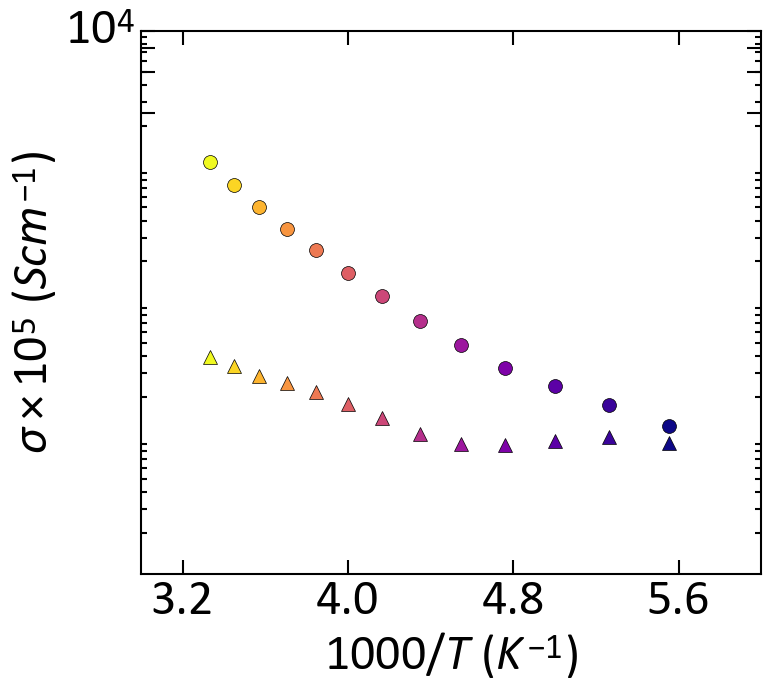

In [95]:


# plot Arrhenius for 0 mV (sans fit)
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(1e3/T[t],sigmaLow0[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
    ax.plot(1e3/T[t],sigmaLow6[t]/1e-11,'o',color = tuple(colSet[t]),markersize = 10)
    
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))


# # plot 600 mV data and fits
# fig,ax = plt.subplots(1,1, figsize = (8,7))
# for t in range(0,tmax):
#     ax.plot(1e3/T[t],sigmaLow6[t]/1e-11,'^',color = tuple(colSet[t]),markersize = 10)
#     ax.plot(1e3/T[t],sigmaHi6[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
# #     ax.plot(1e3/T[t],omegaD_sigma[t]/1e-5,'^',color = tuple(colSet2[t]),markersize = 15)

# ax.plot(1e3/T[8:],LineL6a[:]*1e11,color = 'r',linestyle='dashed' )
# ax.plot(1e3/T[:8],LineL6b[:]*1e11,color = 'r',linestyle='dashed' )

# # ax.plot(1e3/T[:],wLine2[:]*1e5,color = 'r',linestyle='dashed' )
# # ax.plot(1e3/T[:],wLined[:]*1e5,color = 'r',linestyle='dashed' )
# ax.set_xlabel("$1000/T$ ($K^{-1}$)")
# ax.set_ylabel("$\\sigma \\times 10^{5}$ ($S cm^{-1}$)")
# # ax.set_xscale('log')
# ax.set_yscale('log')
# ax.yaxis.set_major_locator(MaxNLocator(4))
# ax.xaxis.set_major_locator(MaxNLocator(5))
# ax.set_xlim([180,300])
# ax.set_ylim([0,4])
# figName = '\\sigmaArrFits_multiW.png'
# plt.savefig(fig2Dir + figName,dpi = 300,bbox_inches = 'tight')

In [108]:
print(T[9])
print(tmax)
print(T[12])

270.0
13
300.0


(100.0, 10000000.0)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


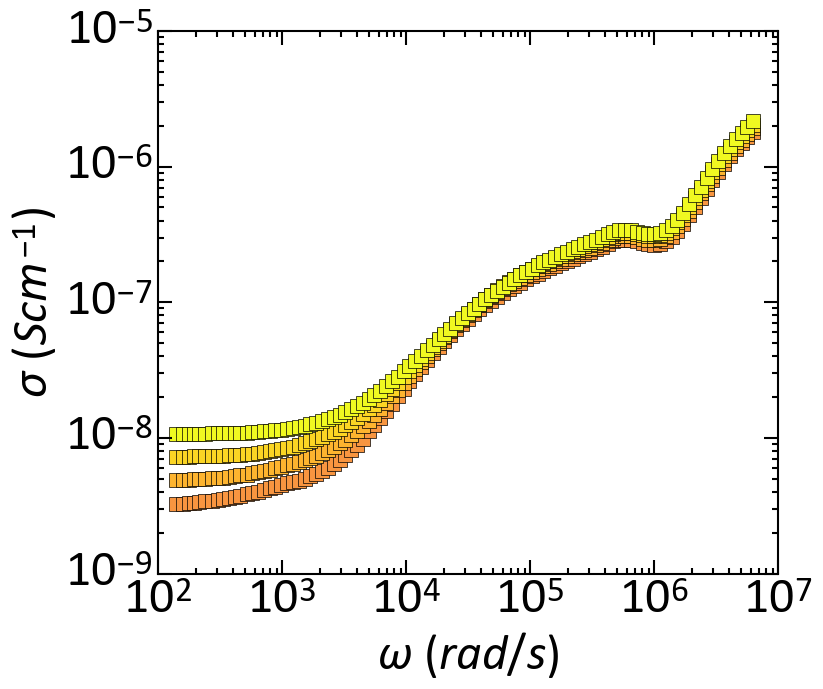

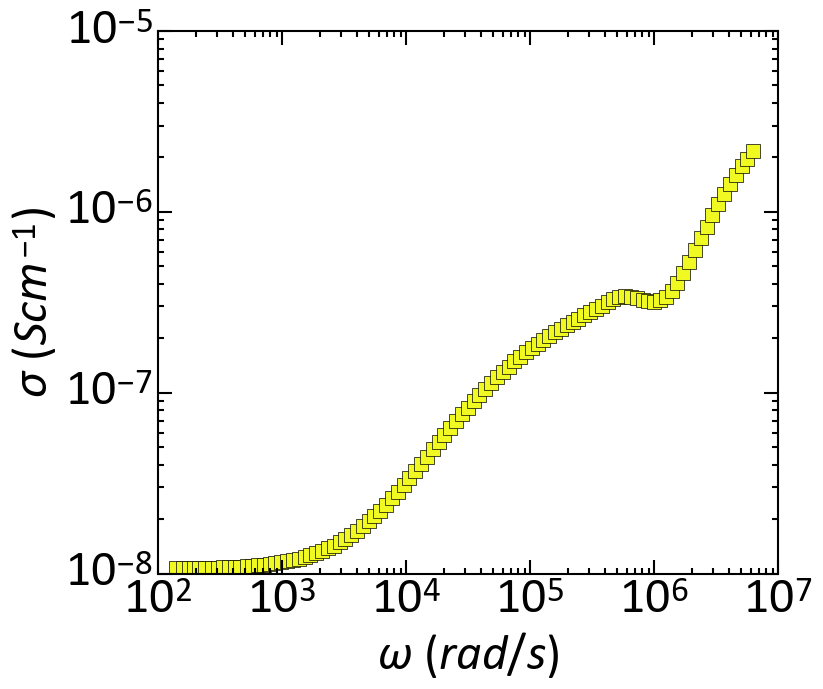

In [109]:
# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(9,tmax):
    ax.plot(w(t),sig600(t),'s',color=tuple(colSet[t]),markersize = 10)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])



# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
ax.plot(w(t),sig600(t),'s',color=tuple(colSet[t]),markersize = 10)
ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])

One last thing: try and fit AC conductivity slope.

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


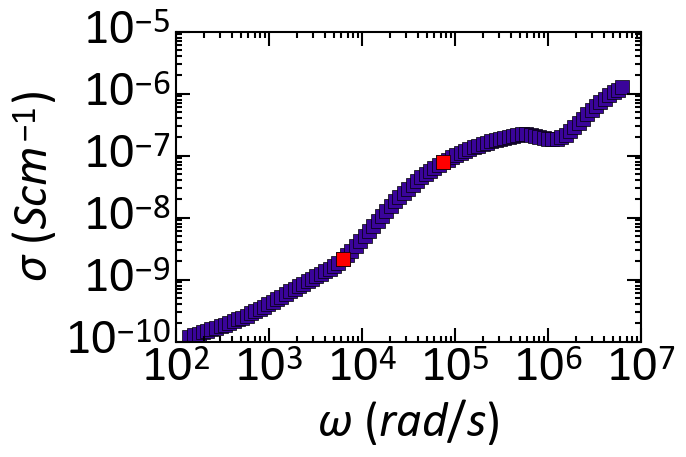

In [103]:
# find bounds
Tt = 1
# plot conductance data
fig,ax = plt.subplots(1,1)
ax.plot(w(Tt),sig600(Tt),'s',color=tuple(colSet[Tt]),markersize = 10)
ax.plot(w(Tt)[35],sig600(Tt)[35],'s',color = 'r',markersize = 10)
ax.plot(w(Tt)[58],sig600(Tt)[58],'s',color = 'r',markersize = 10)
ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])

bound1 = np.zeros((8,1))
bound1[0] = 20
bound1[1] = 25
bound1[2] = 30
bound1[3] = 30
bound1[4] = 32
bound1[5] = 32
bound1[6] = 34
bound1[7] = 35

bound2 = np.zeros((8,1))
bound2[0] = 60
bound2[1] = 60
bound2[2] = 60
bound2[3] = 60
bound2[4] = 58
bound2[5] = 57
bound2[6] = 57
bound2[7] = 58



C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: x and y must have same first dimension

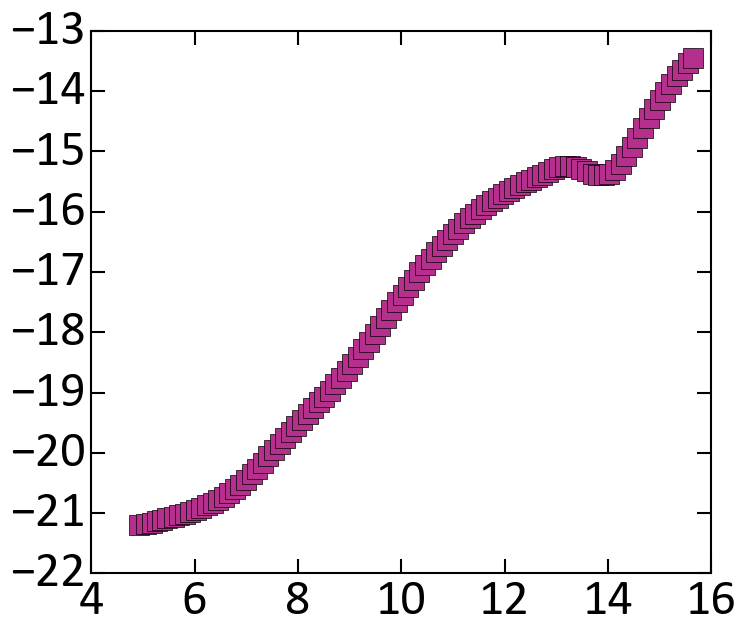

In [102]:
# now run fits to sigma(omega) over these bounds

sigmaFit = np.zeros((2,tmax))

# create list of x- and y-arrays
xSigma = []
ySigma = []

sigmaLine = []
coeff_sigma = []
yLen = []
rmse_sigma =[]
covMatSigma = []
stdErrSigma = []
sErr =[]

for t in range(5,tmax):
    xSigma.append( np.vstack([ np.log(w(t)[bound1[t-8]:bound2[t-8]]) ,np.ones(len(w(t)[bound1[t-8]:bound2[t-8]]))]).T )
    ySigma.append(np.log(sig600(t)[bound1[t-8]:bound2[t-8]]))

# perform fits and create fit lines
for t in range(0,5):
#     print(t)
    sigmaFit[:,t] = np.linalg.lstsq(xSigma[t],ySigma[t])[0]
    sigmaLine.append(sigmaFit[0,t]*np.log(w(t)[bound1[t]:bound2[t]]) + sigmaFit[1,t])
#     error estimates
    coeff_sigma.append([sigmaFit[0,t], sigmaFit[1,t]])
    yLen.append(len(ySigma[t]))
    rmse_sigma.append(np.sum((ySigma[t] - np.dot(xSigma[t],coeff_sigma[t]))**2)/(yLen[t]-len(coeff_sigma[t])))
    covMatSigma.append(rmse_sigma[t]*np.linalg.inv(np.dot(xSigma[t].T,xSigma[t])))
    stdErrSigma.append(np.sqrt(np.diagonal(covMatSigma[t])))
    sErr.append(stdErrSigma[t][1]/1.5*sigmaFit[0,t])
    
    
    
# plot the data with fits
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(5,tmax):
    ax.plot(np.log(w(t)),np.log(sig600(t)),'s',color=tuple(colSet[t]),markersize = 15)
    
    ax.plot(np.log(w(t)[bound1[t-8]:bound2[t-8]]),sigmaLine[t-8],'r')
        
ax.set_xlabel("$log(\\omega)$ ($rad/s$)")
ax.set_ylabel("$log(\\sigma)$ ($S cm^{-1}$)")
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(4))
# figName = '\\G_highOmegaFits.png'
# plt.savefig(fig2Dir + figName,dpi = 300,bbox_inches = 'tight')



# plot s vs. T
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(8,tmax):
    ax.plot(T[t],sigmaFit[0,t-8],'s',color=tuple(colSet[t]),markersize = 15)
    plt.errorbar(T[t],sigmaFit[0,t-8],yerr = sErr[t-8],color=tuple(colSet[t]))
plt.axhline(1,color = 'r')

ax.set_xlabel("$T$ ($K$)")
ax.set_ylabel("$s$ ($arb$)")
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.set_ylim([0.5,1.5])
# figName = '\\s_highOmega.png'
# plt.savefig(fig2Dir + figName,dpi = 300,bbox_inches = 'tight')


print(sErr)

In [11]:
print(stdErrSigma[0][1])

0.0742856242379


In [12]:
sCalc = np.zeros(5)

for t in range(11,tmax):
    sCalc[t-11] = 1-(T[t]/(0.15/kB))
    

print(sCalc)
print(np.size(sCalc))



for t2 in range(11,tmax):
    print(sCalc[t2-11])

[ 0.85063867  0.844894    0.83914933  0.83340467  0.82766   ]
5
0.850638666667
0.844894
0.839149333333
0.833404666667
0.82766


Ok. To dive back into this, let's check whether the 0 bias conductivity at omeagaD matches what we get from TAS.

omegaD , 0mV: [ 0.36889262] +\- [ 0.03335252]
omegaD , 600mV: [ 0.28402708] +\- [ 0.00377036]


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


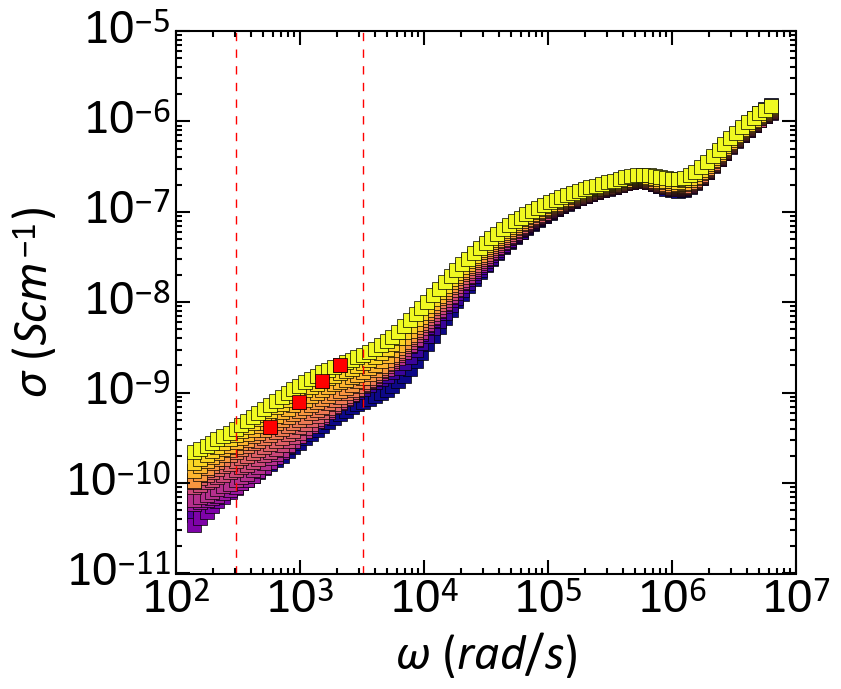

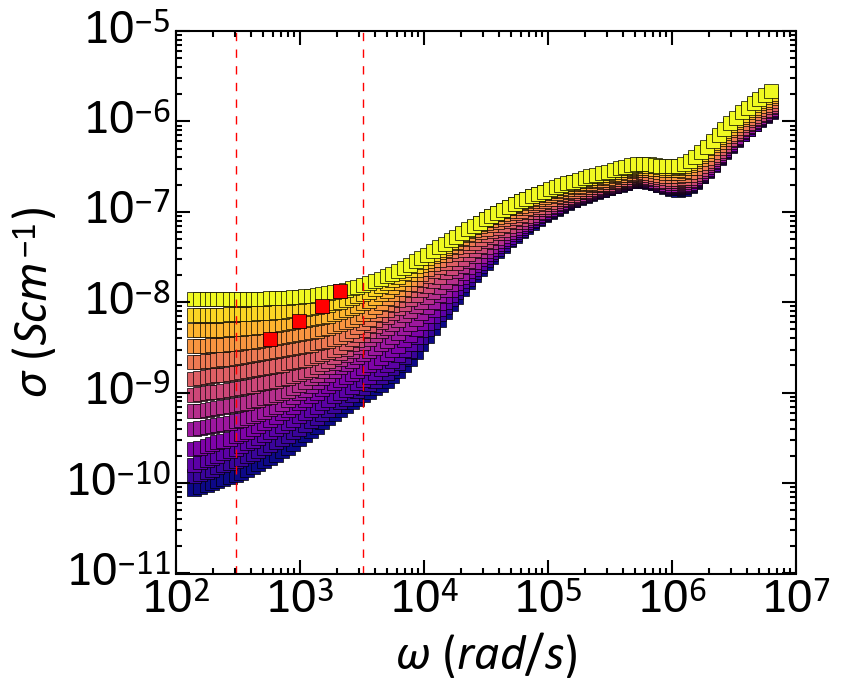

In [112]:
omegaD = np.zeros((4,1))

omegaD[0] = 571.2
omegaD[1] = 880.4
omegaD[2] = 1.4058e3
omegaD[3] = 1.9770e3 

omegaD_ix = np.zeros((4,1))
for k in range(0,len(omegaD)):
    omegaD_ix[k] = np.where(w(t) >= omegaD[k])[0][0]
    
omegaD_ix = omegaD_ix.astype(int)

omegaD_sigma0 = np.zeros((4,1))
omegaD_sigma600 = np.zeros((4,1))
for t in range(0,len(omegaD)):
    omegaD_sigma0[t] = sig0(t+9)[omegaD_ix[t]]
    omegaD_sigma600[t] = sig600(t+9)[omegaD_ix[t]]
    
# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(w(t),sig0(t),'s',color=tuple(colSet[t]),markersize = 10)
    
for k in range(0,len(omegaD)):
    ax.plot(w(k+9)[omegaD_ix[k]],omegaD_sigma0[k],'s',color = 'r',markersize = 10      )
    
plt.axvline(omegaHi,color = 'r',linestyle = 'dashed', linewidth = 1)
plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])    


    
# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(w(t),sig600(t),'s',color=tuple(colSet[t]),markersize = 10)
    
for k in range(0,len(omegaD)):
    ax.plot(w(k+9)[omegaD_ix[k]],omegaD_sigma600[k],'s',color = 'r',markersize = 10      )
    
plt.axvline(omegaHi,color = 'r',linestyle = 'dashed', linewidth = 1)
plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])    





# create data arrays for pmegaD, 0mV 
xWd0 = np.vstack( [1e3/T[9:],np.ones(len(T[9:]))]).T
yWd0 = np.log(omegaD_sigma0[:])

# create data arrays for omegaD, 600mV 
xWd600 = np.vstack( [1e3/T[9:],np.ones(len(T[9:]))]).T
yWd600 = np.log(omegaD_sigma600[:])

# fit to omegaD, 0mV with error estimates
mWd0,cWd0 = np.linalg.lstsq(xWd0,yWd0)[0]
EwD0 = np.abs((kB*mWd0)*1e3)
LineWd0 =  np.exp(mWd0*(1e3/T[10:14])) * np.exp(cWd0)
coeffWd0 = np.array([mWd0, cWd0])
# error estimates
dLenWd0 = len(yWd0)
coeffLenWd0 = len(coeffWd0)
rmseWd0 = np.sum((yWd0 - np.dot(xWd0,coeffWd0))**2)/(dLenWd0-coeffWd0)
covMatWd0 = rmseWd0*np.linalg.inv(np.dot(xWd0.T,xWd0))
stdErrWd0 = np.sqrt(np.diagonal(covMatWd0))
EwD_err0 = stdErrWd0[0]*EwD0


# fit to omegaD, 600mV with error estimates
mWd600,cWd600 = np.linalg.lstsq(xWd600,yWd600)[0]
EwD600 = np.abs((kB*mWd600)*1e3)
LineWd600 =  np.exp(mWd600*(1e3/T[10:14])) * np.exp(cWd600)
coeffWd600 = np.array([mWd600, cWd600])
# error estimates
dLenWd600 = len(yWd600)
coeffLenWd600 = len(coeffWd600)
rmseWd600 = np.sum((yWd600 - np.dot(xWd600,coeffWd600))**2)/(dLenWd600-coeffWd600)
covMatWd600 = rmseWd600*np.linalg.inv(np.dot(xWd600.T,xWd600))
stdErrWd600 = np.sqrt(np.diagonal(covMatWd600))
EwD_err600 = stdErrWd600[0]*EwD600


print('omegaD , 0mV: {}'.format(EwD0) + ' +\- {}'.format(EwD_err0))
print('omegaD , 600mV: {}'.format(EwD600) + ' +\- {}'.format(EwD_err600))






(100.0, 10000000.0)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


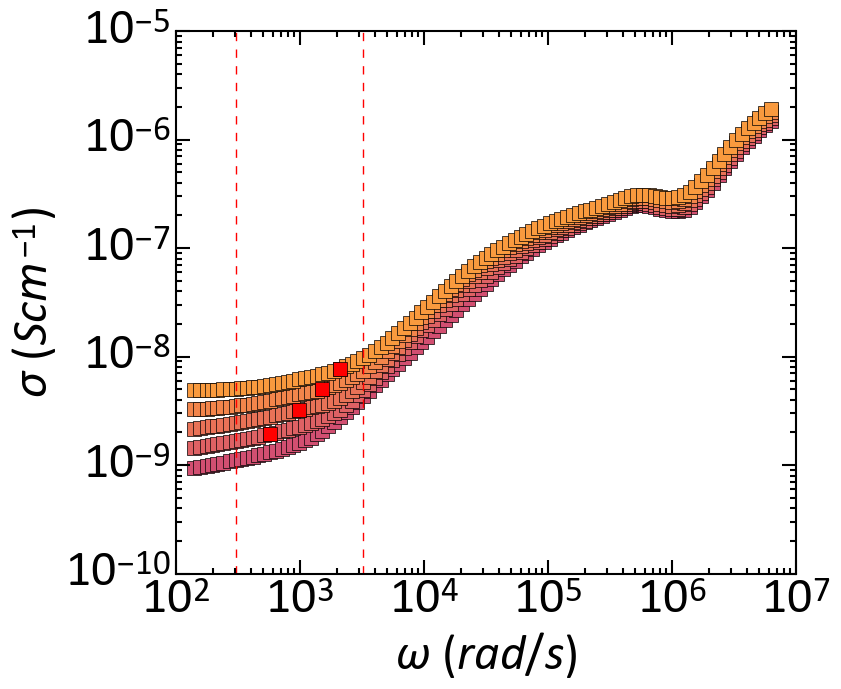

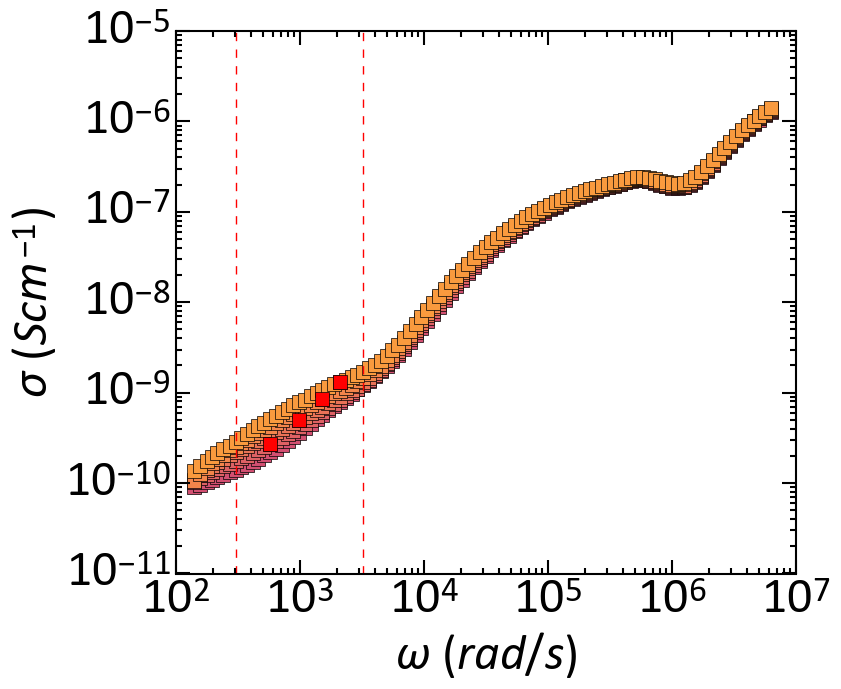

In [79]:
# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(9,14):
    ax.plot(w(t),sig600(t),'s',color=tuple(colSet[t]),markersize = 10)
    
for k in range(0,len(omegaD)):
    ax.plot(w(k+10)[omegaD_ix[k]],omegaD_sigma600[k],'s',color = 'r',markersize = 10      )
    
plt.axvline(omegaHi,color = 'r',linestyle = 'dashed', linewidth = 1)
plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])    




# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(9,14):
    ax.plot(w(t),sig0(t),'s',color=tuple(colSet[t]),markersize = 10)
    
for k in range(0,len(omegaD)):
    ax.plot(w(k+10)[omegaD_ix[k]],omegaD_sigma0[k],'s',color = 'r',markersize = 10      )
    
plt.axvline(omegaHi,color = 'r',linestyle = 'dashed', linewidth = 1)
plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])  

(100.0, 10000000.0)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


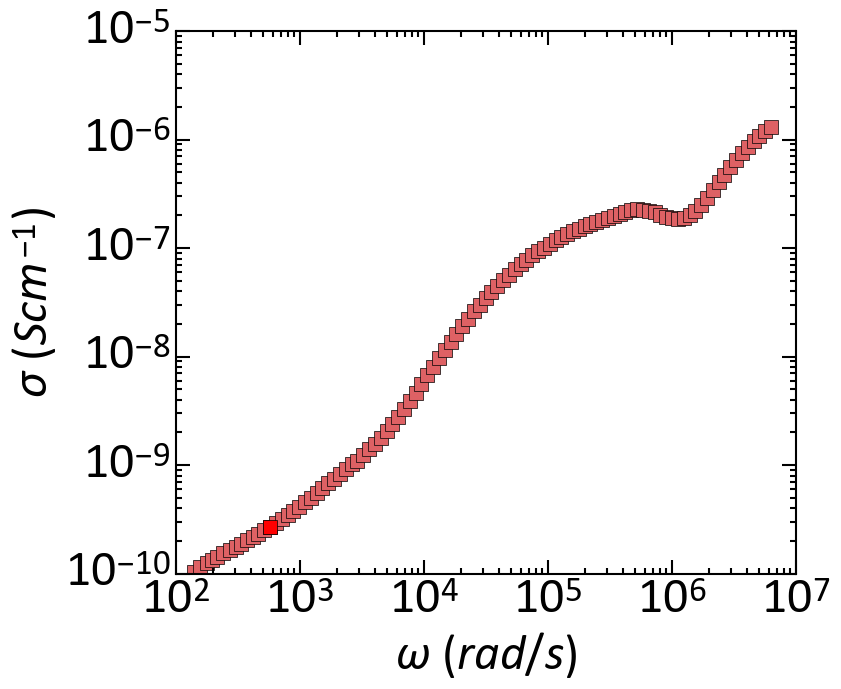

In [85]:

Tt = 10

# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))

ax.plot(w(Tt),sig0(Tt),'s',color=tuple(colSet[Tt]),markersize = 10)

ax.plot(w(Tt)[omegaD_ix[Tt-10]],omegaD_sigma0[Tt-10],'s',color = 'r',markersize = 10      )

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])

(100.0, 10000000.0)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


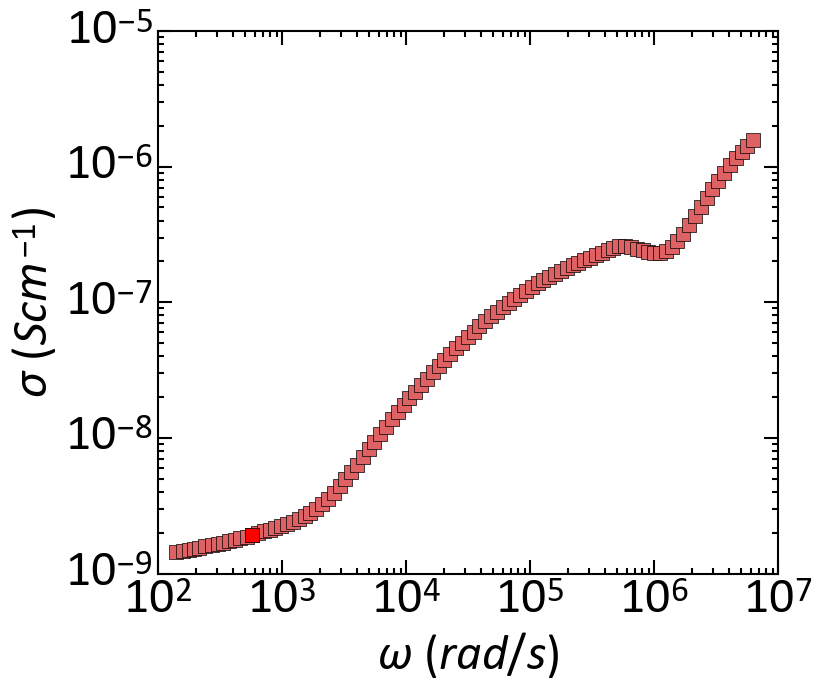

In [86]:
Tt = 10

# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))

ax.plot(w(Tt),sig600(Tt),'s',color=tuple(colSet[Tt]),markersize = 10)

ax.plot(w(Tt)[omegaD_ix[Tt-10]],omegaD_sigma600[Tt-10],'s',color = 'r',markersize = 10      )

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])

In [43]:
print(w(t+10)[omegaD_ix[:]])
print(omegaD_sigma[:])
print(len(T[10:14]))
print(len(omegaD_sigma))

[[  571.769863]
 [  980.176908]
 [ 1514.248   ]
 [ 2092.301   ]]
[[  2.69517232e-10]
 [  5.02604390e-10]
 [  8.48775361e-10]
 [  1.31101207e-09]]
4
4


In [29]:
omegaD_sigma = np.zeros((4,1))
for t in range(0,len(omegaD)):
    omegaD_sigma[t] = sig0(t+10)[omegaD_ix[t]]
#     print(omegaD_sigma)

print(omegaD_sigma)

[[  2.69517232e-10]
 [  5.02604390e-10]
 [  8.48775361e-10]
 [  1.31101207e-09]]


# Figure Plots# 

Not going to bother exporting them to MatLab because at this point, I just need to finish these Figures!

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(100.0, 10000000.0)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


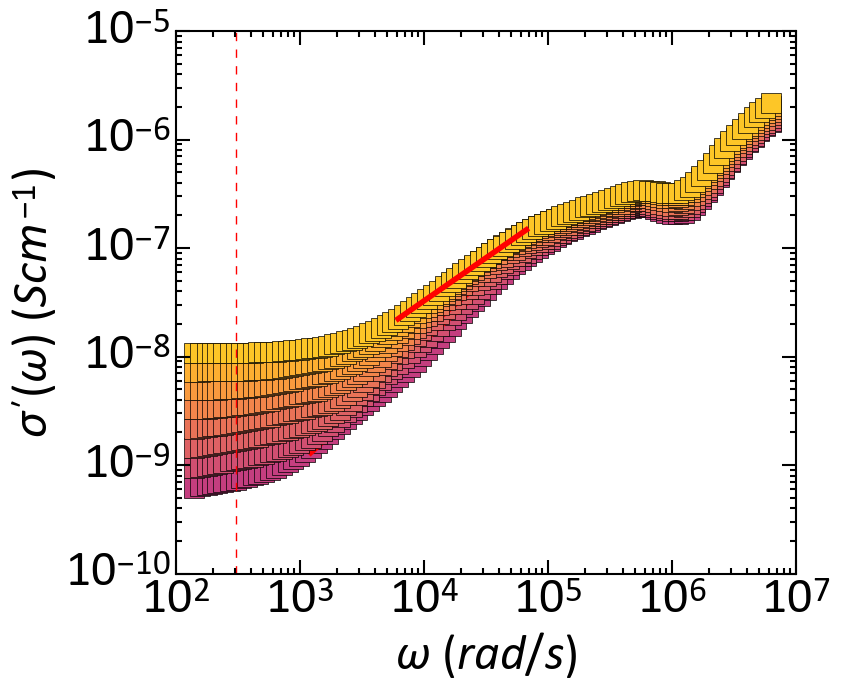

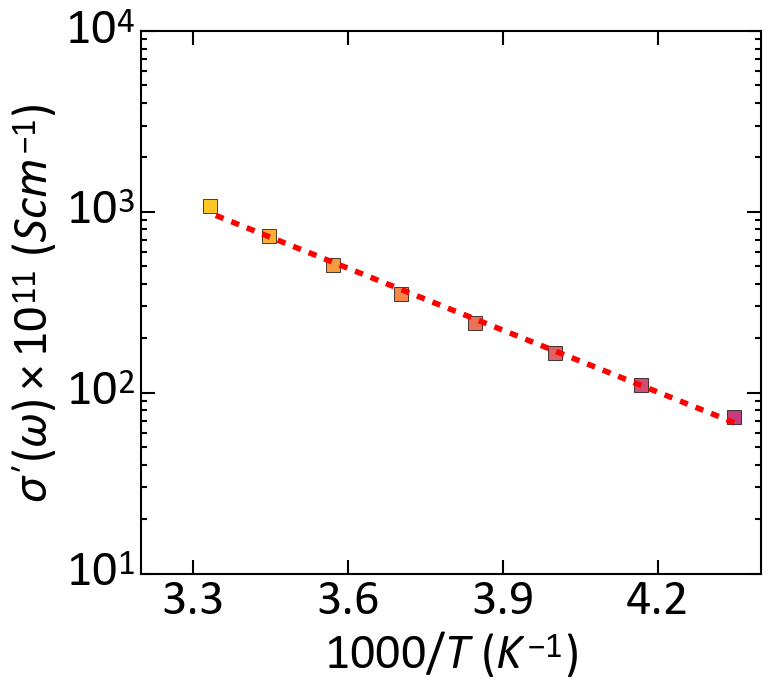

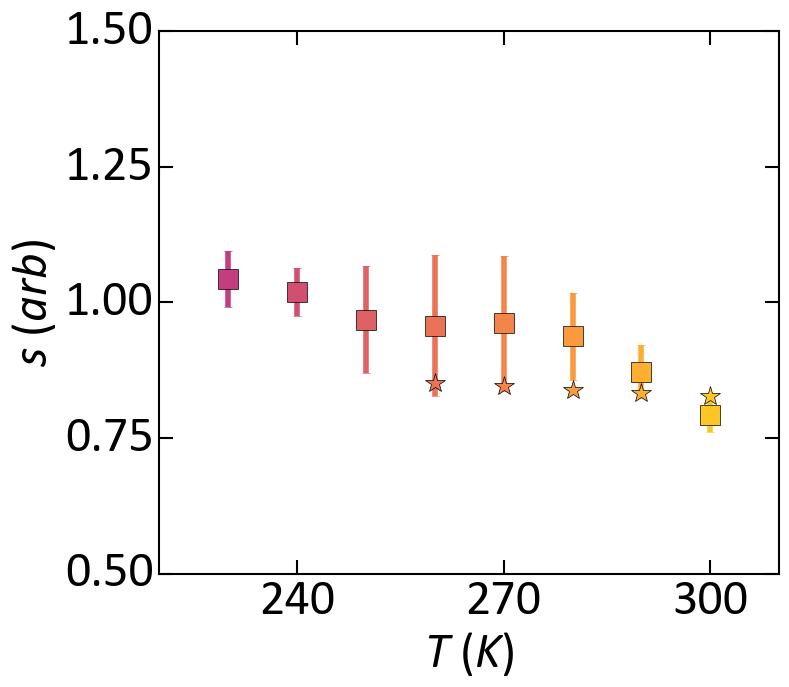

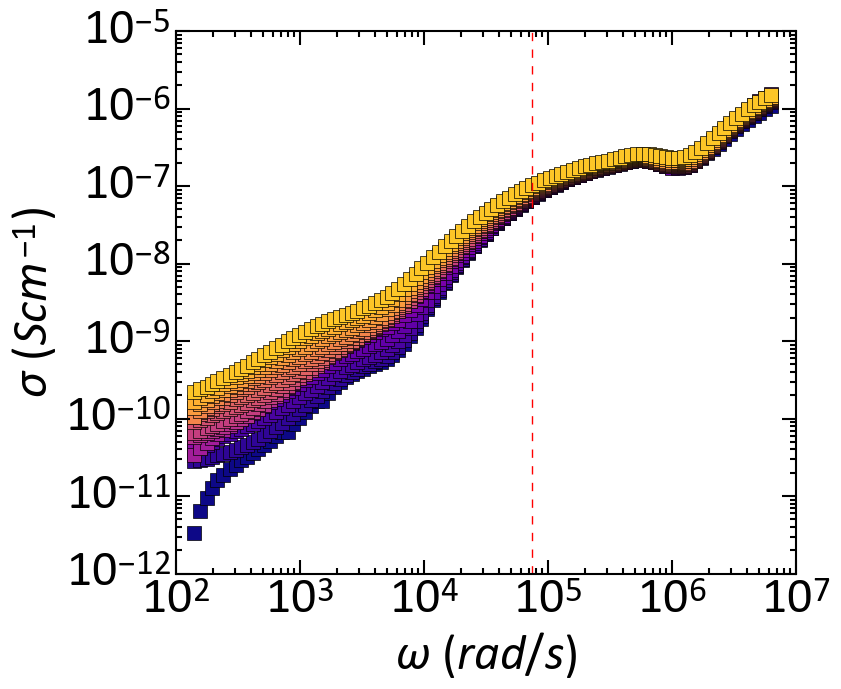

In [13]:
figDir = r'C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\ligand_manuscript\currentVersion\MPA\ACconductance'

# plot the data with fits
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(8,tmax):
    ax.plot(w(t),sig600(t),'s',color=tuple(colSet[t]),markersize = 15)
    
    ax.plot(w(t)[bound1[t-8]:bound2[t-8]],np.exp(sigmaLine[t-8]),'r')
    

plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)
        
ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma'(\\omega)$ ($S cm^{-1}$)")
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.set_xscale('log')
ax.set_yscale('log')
# figName = '\\sigmaFits.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')


# plot 600 mV data and fits
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(8,tmax):
    ax.plot(1e3/T[t],sigmaLow6[t]/1e-11,'s',color = tuple(colSet[t]),markersize = 10)
#     ax.plot(1e3/T[t],sigmaHi6[t]/1e-11,'v',color = tuple(colSet[t]),markersize = 10)
#     ax.plot(1e3/T[t],omegaD_sigma[t]/1e-5,'^',color = tuple(colSet2[t]),markersize = 15)

ax.plot(1e3/T[8:],LineL6a[:]*1e11,color = 'r',linestyle='dashed' )
# ax.plot(1e3/T[:8],LineL6b[:]*1e11,color = 'r',linestyle='dashed' )

# ax.plot(1e3/T[:],wLine2[:]*1e5,color = 'r',linestyle='dashed' )
# ax.plot(1e3/T[:],wLined[:]*1e5,color = 'r',linestyle='dashed' )
ax.set_xlabel("$1000/T$ ($K^{-1}$)")
ax.set_ylabel("$\\sigma'(\\omega) \\times 10^{11}$ ($S cm^{-1}$)")
# ax.set_xscale('log')
ax.set_yscale('log')
# ax.yaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_major_locator(MaxNLocator(5))
# ax.set_xlim([180,300])
# ax.set_ylim([0,4])
# figName = '\\Arrhenius_DC.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')


# plot s vs. T
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(8,tmax):
    ax.plot(T[t],sigmaFit[0,t-8],'s',color=tuple(colSet[t]),markersize = 15)
    plt.errorbar(T[t],sigmaFit[0,t-8],yerr = sErr[t-8],color=tuple(colSet[t]))

for t2 in range(11,tmax):
    ax.plot(T[t2],sCalc[t2-11],'*',color=tuple(colSet[t2]),markersize = 15)

# plt.axhline(1,color = 'r')

ax.set_xlabel("$T$ ($K$)")
ax.set_ylabel("$s$ ($arb$)")
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.set_ylim([0.5,1.5])
ax.set_xlim([220,310])
# figName = '\\s_Err.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(w(t),sig0(t),'s',color=tuple(colSet[t]),markersize = 10)
    
plt.axvline(7.4e4,color = 'r',linestyle = 'dashed', linewidth = 1)
# plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7]) 
# figName = '\\sigma0_omegaD.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

In [14]:
omegaD_ix = np.where(w(1) >= 7.44e4)[0][0]

print(sig0(15)[omegaD_ix])
sigmaDt = sig0(15)[omegaD_ix]

1.01945724474e-07


In [22]:
# assume omegaD due to MPA freeze out or something. what do we get?

(sigmaDt/(eps_r1*eps0))*(63/220)

32972.15763727163

In [25]:
# what is the mobility associated with this conductivity?
q = 1.602e-19
Na = 1e23

muD_est = (sigmaDt*100)/(q*Na)

print(muD_est)

6.3636532131e-10


In [69]:
# assume omegaD is due to ZnO freeze out (likely....) what is the conductivity we estimate?

fd1 = 7.441e4/(2*np.pi)
print(fd1)

sigmaD_test = (eps_r2*eps0*fd1*1e-5)/3.5e-6
print(sigmaD_test)


11842.719315467932
1.1084717606596182e-08


In [16]:
# w/d calculation

fd1 = 7.441e4/(2*np.pi)
fd2 = 7.4411e4
print(fd1)


# thickness of MPA layer in cm
D_pbs = 1.90e-5

# area of cell in cm
area = 4e-2

# epsilon of MPA
eps_r1 = 10

# epsilon of ZnO
eps_r2 = 3.7

# vacucum permittivity in cm
eps0 = 8.854e-14

# total geometric capacitance (high frequency plateau) in F
Ct = 1.16e-9

# esimated carrier concentration for PbS
NaEst = 1e17

# elementary charge
q = 1.602e-19

# mobility estimate for MPa
muEst = 5e-3

wRatio = (6.5*eps0*fd1)/(sigmaDt)


print(wRatio)
print(wRatio*220)




11842.719315467932
0.0668552156397
14.7081474407


In [16]:
cd1 = 140*area*1e-9
print(cd1)

cg1 = 30*area*1e-9
# print(cg1)

5.6000000000000005e-09


In [17]:
cd2 = ( (cg1/fd1) - (cd1*((10*eps0)/(q*5e-3*1e17))) )/ ((eps_r2*eps0)/(q*3e-3*1e15))

In [18]:
(eps_r2*eps0*area)/cd2

8.820521989224317e-08

In [19]:
(eps_r1*eps0*area)/cd1

6.324285714285713e-06

In [20]:
(q*5e-3*1e17)/(eps0*eps_r1)*(6.3e-6/1.90e-5)

29997146.695516743

In [21]:
ct_inv = (1.90e-5/(eps_r1*eps0*area)) + (1.0e-5/(eps_r2*eps0*area))

ctot = 1/ct_inv

ctot*area*1e9

0.030778438050499117

In [22]:
cZnO_inv = 1/cg1 - (1.90e-5/(eps_r1*eps0*area))

cZnO = 1/cZnO_inv

d_est_ZnO = (eps0*eps_r2*area)/cZnO
print(d_est_ZnO)


3.889933333333333e-06


In [23]:
cg1/( (cd1* ((eps_r1*eps0)/(q*1e-3*1e17))) + (3.37e-9* ((eps_r2*eps0)/(q*3e-3*1e17)))  )

3609299.181354095

In [24]:
((q*1e-5*1e17)/(eps_r2*eps0)) * (63/190)

162146.7388946851

In [25]:
(63/190)*(fd2*eps0*eps_r1)

2.184558138e-08

In [26]:
np.sqrt( (2*eps0*eps_r1*0.9) / (q*1e17) )

9.9741238245479862e-06

In [27]:
(eps0*eps_r1*area)/1.9e-5

1.8639999999999998e-09

(100.0, 10000000.0)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


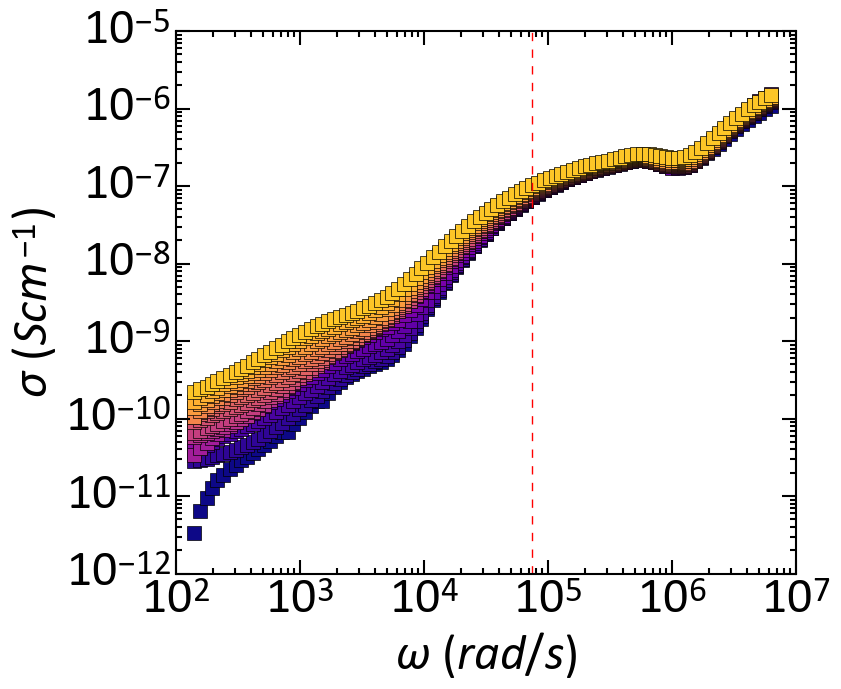

In [28]:
# plot conductance data
fig,ax = plt.subplots(1,1, figsize = (8,7))
for t in range(0,tmax):
    ax.plot(w(t),sig0(t),'s',color=tuple(colSet[t]),markersize = 10)
    
plt.axvline(7.4e4,color = 'r',linestyle = 'dashed', linewidth = 1)
# plt.axvline(omegaLow,color = 'r',linestyle = 'dashed', linewidth = 1)

ax.set_xlabel("$\\omega$ ($rad/s$)")
ax.set_ylabel("$\\sigma$ ($S cm^{-1}$)")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_locator(MaxNLocator(4))
ax.set_xlim([1e2,1e7])   

In [29]:
print(figDir)

C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\ligand_manuscript\currentVersion\MPA\ACconductance


In [30]:
# print(os.getcwd())

# import scipy.io

# scipy.io.savemat('sigmaOmegaFig1', dict(pyOmega = w2(1) ,pySigma = master0mv2[:,:,4]*(90e-6/4e-2), sigmaBound1 = bound4, sigmaBound2 = bound5, powerFit = lineHighF, pyOmegaD = omegaD, hOmega = omegaS, lOmega = omegaS2))
# scipy.io.savemat('sigmaOmegaFig2', dict(hOmegaMat = omegaSmat, lOmegaMat = omegaSmat2, pyOmegaDsigma = omegaD_sigma, lthwLine = wLine1, ltlwLine = wLine1b, hthwLine = wLine2, wLineD = wLined))
